-------------------------------------------------------------------------------------------------------------------------------

# Regression
1. [Definition](#section1)<br>
2. [Simple Linear Regression](#section2)
3. [Multiple Linear Regression](#section3)




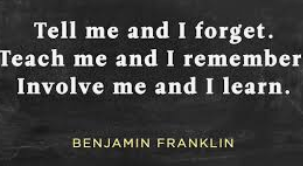

<a id=section1></f>
## Definition


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature.
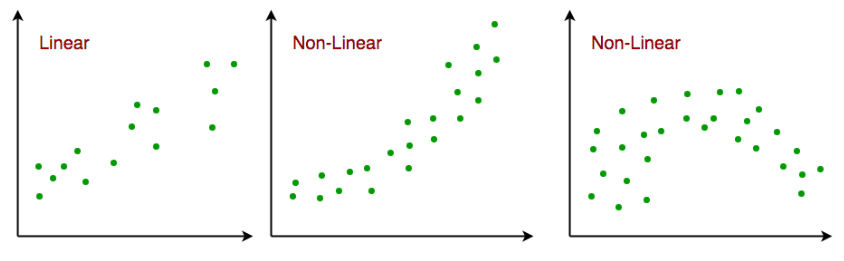

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.

#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

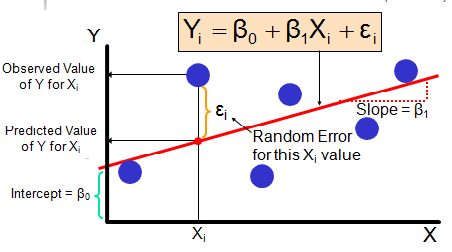



<a id=section2></f>
## Simple Linear Regression


- Lets  assume that the two variables are linearly related. 
- Find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

- x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
- y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]


x as feature vector, i.e x = [x_1, x_2, …., x_n],

y as response vector, i.e y = [y_1, y_2, …., y_n]

for n observations (in above example, n=10).

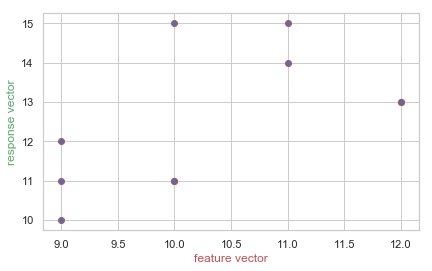

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]

plt.scatter(x,y, edgecolors='r')
plt.xlabel('feature vector',color="r")
plt.ylabel('response vector',color="g")
plt.show()

- Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)
This line is called regression line.

The equation of regression line is represented as:

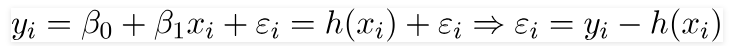

Here,

h(x<sub>i</sub>) represents the predicted response value for ith observation.
b(<sub>0</sub>) and b(<sub>1</sub>) are regression coefficients and represent y-intercept and slope of regression line respectively.

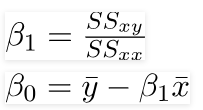
where (SS<sub>xx</sub>) is the sum of cross-deviations of y and x:

Estimated coefficients:
b_0 = 3.5619834710743117 \ 
b_1 = 0.8677685950413289


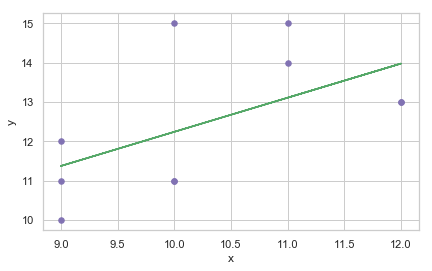

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
# number of observations/points 
 n = np.size(x) 

# mean of x and y vector 
 m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
 SS_xy = np.sum(y*x) - n*m_y*m_x 
 SS_xx = np.sum(x*x) - n*m_x*m_x 
# calculating regression coefficients 
 b_1 = SS_xy / SS_xx 
 b_0 = m_y - b_1*m_x 
 return(b_0, b_1) 

def plot_regression_line(x, y, b): 
# plotting the actual points as scatter plot 
 plt.scatter(x, y, color = "m", marker = "o", s = 30) 

# predicted response vector 
 y_pred = b[0] + b[1]*x 

# plotting the regression line 
 plt.plot(x, y_pred, color = "g") 

# putting labels 
 plt.xlabel('x') 
 plt.ylabel('y') 

# function to show plot 
 plt.show() 

def main(): 
# observations 
 x =np.array([9, 10, 11, 12, 10, 9, 9, 10, 12, 11])
 y =np.array([10, 11, 14, 13, 15, 11, 12, 11, 13, 15])

# estimating coefficients 
 b = estimate_coef(x, y) 
 print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 
 
# plotting regression line 
 plot_regression_line(x, y, b) 

if __name__ == "__main__": 
 main() 


<a id=section3></f>
## Multiple linear regression


Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

Clearly, it is nothing but an extension of Simple linear regression.

Consider a dataset with p features(or independent variables) and one response(or dependent variable).
Also, the dataset contains n rows/observations.
The regression line for p features is represented as:
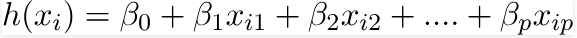
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_p are the regression coefficients.

### Scikit -Learn
 - A library for machine learning for python language
 - Contains tools for machine learning algorithm and stats modelling
 
#### Installation
- conda install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
c_data=pd.read_csv("F:\ML & Data Visualization\cars.csv")

In [4]:
c_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
c_data = c_data.replace('?', np.nan)
c_data = c_data.dropna()

In [ ]:
eda_report = pandas_profiling.ProfileReport(c_data)
eda_report


In [27]:
## drop down following : the model name, the geographical origin and the year that the model was built. 
c_data = c_data.drop(['name','origin','model_year'], axis=1)
X = c_data.drop('mpg', axis=1)
y = c_data[['mpg']]


In [28]:
## we’ll split the dataset into a train set and a test set. 
## Scikit-learn has a very straightforward train_test_split function for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

### Lets build the regression model. First, let’s try a model with only one variable. We want to predict the mileage per gallon by looking at the horsepower of a car.

In [29]:
reg = LinearRegression()
reg.fit(X_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###  Evaluation metrics for linear regression are mean squared error and the R² score.

In [30]:
y_predicted = reg.predict(X_test[['horsepower']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 28.66
R²: 0.59


### Insights

- The **best** possible score is **1.0**, We get a model with a mean squared error of **28.66** and an R² of**0.59**. Not so good

### Let’s add more variables to the model weight and cylinders(Multi)

In [31]:
reg = LinearRegression()
reg.fit(X_train[['horsepower','weight','cylinders']], y_train)
y_predicted = reg.predict(X_test[['horsepower','weight','cylinders']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 19.12
R²: 0.72


### Insights
- Now our Model is better as **R²= 0.72**